# Installation de selenium

Décommetez et exécutez le code ci-dessous si selenium n'est pa encore installé

In [2]:
#! pip install selenium

In [158]:
from selenium import  webdriver
import time # Pour pouvoir utiliser la fonction sleep
import re # Expression regulière

In [6]:
driver_path = "C:/Users/NKA/Downloads/chromedriver.exe"

In [7]:
# Créer un navigateur
# téléchargerr le driver
# * Firefox : https://github.com/mozilla/geckodriver/releases
# Chrome : https://chromedriver.chromium.org/downloads
driver = webdriver.Chrome(executable_path= driver_path)

In [8]:
driver.get("https://www.google.com/flights?hl=fr&gl=fr")

In [9]:
# page = driver.page_source
# page[:1000]

In [13]:
origin_airport = driver.find_element_by_css_selector(
    "div[data-flt-ve='origin_airport'][class*='flt-input']")

In [42]:
# len(origin_airport)

In [14]:
origin_airport.get_attribute("outerHTML") # Pour vérifier visuellement

'<div data-flt-ve="origin_airport" jsaction="jsl._;f_f:jsl._;ica_bc:jsl._;keydown:jsl._" class="flt-input gws-flights-form__input-container gws-flights__flex-box gws-flights-form__airport-input gws-flights-form__empty gws-flights-form__swapper-right" role="presentation" jsan="0.data-flt-ve,22.jsaction,t-ch-jmKqQoDY,7.flt-input,7.gws-flights-form__input-container,7.gws-flights__flex-box,7.gws-flights-form__airport-input,7.gws-flights-form__empty,7.gws-flights-form__swapper-right,0.role,21.jssc" jstcache="573"><div jscontroller="pSNSIe" class="gws-flights-widgets-inputcapturearea__capture-area-wrapper" jsaction="rcuQ6b:npT2md" jstcache="468"><span jsname="bOjMyf" style="display:none" aria-live="polite" jsvs="\'bOjMyf\';" jsan="0.jsname,5.display,0.aria-live,t-uU8ghUBFeaU" id="flt-ica-1" jstcache="492"> <span jsan="t-qoTycjZOEvo,21.jssc" jstcache="489">D\'où partez-vous&nbsp;?</span> <jsl jstcache="490"></jsl> </span><textarea jsname="LlUqIb" class="gws-flights-widgets-inputcapturearea__c

In [15]:
origin_airport.click() # Pour cliquer et faire apparaître le formulaire 

In [38]:
# origin_airport.send_keys("abidjan")

In [16]:
origin_airport2 = driver.find_element_by_css_selector(
    "input[placeholder*='partez-vous']")

In [19]:
origin_airport2.clear() # vider la zone de saisie

In [20]:
origin_airport2.send_keys("paris") # Remplir la zone de saisie

In [22]:
origin_airport3 = driver.find_element_by_css_selector(
    ".fsapp-option-content .fsapp-option-city-name")

In [23]:
origin_airport3.click()

In [24]:
destination_airport = driver.find_element_by_css_selector(
    "div[data-flt-ve='destination_airport'][class*='flt-input']")

In [25]:
destination_airport.click()

In [26]:
destination_airport2 = driver.find_element_by_css_selector(
    "input[placeholder*='allez-vous']")

In [27]:
destination_airport2.clear() # vider la zone de saisie

In [28]:
destination_airport2.send_keys("New York")

In [29]:
destination_airport3 = driver.find_element_by_css_selector(
    ".fsapp-option-content .fsapp-option-city-name")

In [30]:
destination_airport3.click()

In [31]:
search_button = driver.find_element_by_css_selector(
".gws-flights-form__search-button-wrapper floating-action-button.gws-flights-form__search-button")

In [32]:
search_button.click()

In [33]:
expand_button = driver.find_element_by_css_selector(
                        ".gws-flights-results__dominated-toggle")

In [34]:
expand_button.click()

In [35]:
# import requests
# chat = requests.get(
# "https://lemagduchat.ouest-france.fr/images/dossiers/2018-11/chat-drole-113730.jpg")
# with open("chat.jpg", "wb") as f:
#     f.write(chat.content)

In [40]:
def remplir_depart(depart):
    css_origin_airport = "div[data-flt-ve='origin_airport'][class*='flt-input']"
    origin_airport = driver.find_element_by_css_selector(css_origin_airport)
    origin_airport.click() # Pour cliquer et faire apparaître le formulaire 
    time.sleep(1)
    
    css_origin_airport2 = "input[placeholder*='partez-vous']"
    origin_airport2 = driver.find_element_by_css_selector(
                                            css_origin_airport2)
    origin_airport2.clear()
    origin_airport2.send_keys(depart)
    time.sleep(2)

    css_origin_airport3 = ".fsapp-option-content .fsapp-option-city-name"
    origin_airport3 = driver.find_element_by_css_selector(
                                        css_origin_airport3)
    origin_airport3.click()

In [36]:
def remplir_arrivee(arrivee):
    css_destination_airport = "div[data-flt-ve='destination_airport'][class*='flt-input']"
    destination_airport = driver.find_element_by_css_selector(
        css_destination_airport)
    destination_airport.click() # Pour cliquer et faire apparaître le formulaire 
    time.sleep(1)
    
    css_destination_airport2 = "input[placeholder*='allez-vous']"
    destination_airport2 = driver.find_element_by_css_selector(
                                            css_destination_airport2)
    destination_airport2.clear()
    destination_airport2.send_keys(arrivee)
    time.sleep(2)

    css_destination_airport3 = ".fsapp-option-content .fsapp-option-city-name"
    destination_airport3 = driver.find_element_by_css_selector(
                                        css_destination_airport3)
    destination_airport3.click()

In [37]:
def rechercher():
    search_button = driver.find_element_by_css_selector(
            ".gws-flights-form__search-button-wrapper " 
        + "floating-action-button.gws-flights-form__search-button")
    search_button.click()
    
def derouler():
    expand_button = driver.find_element_by_css_selector(
                        ".gws-flights-results__dominated-toggle")
    expand_button.click()

In [42]:
def prix_vol(depart = "Paris", arrivee = "Abidjan"):
    driver.get("https://www.google.com/flights?hl=fr&gl=fr")
    time.sleep(1)
    remplir_depart(depart)
    time.sleep(2)
    remplir_arrivee(arrivee)
    rechercher()
    time.sleep(2)
    derouler()

In [43]:
prix_vol()

In [44]:
from bs4 import BeautifulSoup

In [175]:
html=  driver.find_element_by_css_selector("html")
page_source = html.get_attribute("outerHTML")

In [176]:
soup = BeautifulSoup(page_source)

### Sélection  de toutes les lignes de la table

In [177]:
rows = soup.select( 
 ".gws-flights-results__result-list .gws-flights-results__result-item")

In [178]:
row = rows[-1]

### Block N° 2 : Temps de vol & compagnie

In [179]:
time_block = row.select_one(".gws-flights-results__itinerary-times")

In [180]:
time_block

<div class="gws-flights-results__itinerary-times gws-flights__ellipsize" data-animation-slideout=""> <div class="gws-flights-results__times-row"> <div class="gws-flights-results__times flt-subhead1"><span> <span jsaction="mouseenter:pCNdcd;mouseleave:QsRKXb" jscontroller="lLN5lc" jsdata="Dij6Dd;;2171"> <span>06:30</span> </span> </span> – <span> <span jsaction="mouseenter:pCNdcd;mouseleave:QsRKXb" jscontroller="lLN5lc" jsdata="Dij6Dd;;2172"> <span>00:30</span><span class="gws-flights__offset-days">+1</span> </span> </span> </div> </div> <div class="gws-flights-results__carriers gws-flights__ellipsize gws-flights__flex-box gws-flights__align-center flt-caption"> <span class="gws-flights__ellipsize"><span><span>Royal Air Maroc</span></span></span> <span class="gws-flights-results__airline-extra-info gws-flights__ellipsize"> <span class="gws-flights-results__disclosure"><span><div class="gws-flights__separator"></div><span>Vol opéré par <span><span>Ram Express</span></span></span></span><

In [181]:
# with open("time_block.html", "w")  as f:
#     f.write(str(time_block))

In [182]:
spans = time_block.select("span>span>span")
spans

[<span>06:30</span>,
 <span>00:30</span>,
 <span class="gws-flights__offset-days">+1</span>,
 <span>Royal Air Maroc</span>,
 <span><div class="gws-flights__separator"></div><span>Vol opéré par <span><span>Ram Express</span></span></span></span>,
 <span>Vol opéré par <span><span>Ram Express</span></span></span>,
 <span><span>Ram Express</span></span>,
 <span>Ram Express</span>]

In [199]:
# len(time_block.select(".gws-flights-results__times"))

In [183]:
time_block_values = {"departure": spans[0].text,
                     "arrival":  spans[1].text,
                     "company":  spans[2].text
                    }
time_block_values

{'departure': '06:30', 'arrival': '00:30', 'company': '+1'}

In [200]:
def get_time_block(row) :
    time_block = row.select_one(".gws-flights-results__itinerary-times")
    spans = time_block.select("span>span>span")
    time_block_values = {"departure": spans[0].text,
                     "arrival":  spans[1].text,
                     "company":  spans[2].text}
    return time_block_values

In [201]:
get_time_block(row)

{'departure': '06:30', 'arrival': '00:30', 'company': '+1'}

### Block N° 4 : escales

In [210]:
stops_block = row.select_one(".gws-flights-results__itinerary-stops")
stops_block

<div class="gws-flights-results__itinerary-stops gws-flights__ellipsize" data-animation-fadeout=""> <div> <div class="gws-flights-results__stops flt-subhead1Normal"> <div><span>2 escales</span></div> </div> </div> <div class="gws-flights-results__layover-time flt-caption"> <span><span data-airportcode="RAK" jscontroller="U6dg7d"><span jsaction="mouseenter:pCNdcd;mouseleave:QsRKXb">RAK</span></span><span data-airportcode="CMN" jscontroller="U6dg7d"><span>, </span><span jsaction="mouseenter:pCNdcd;mouseleave:QsRKXb">CMN</span></span></span> </div> </div>

In [214]:
nb_stops = stops_block.select_one(
    ".gws-flights-results__stops span").text
nb_stops = nb_stops.split("\xa0")[0]
nb_stops

'2'

In [215]:
details  = stops_block.select_one(
    ".gws-flights-results__layover-time span").text
# duration = duration.split("\xa0")
details

'RAK, CMN'

In [216]:
def get_stops_block(row):
    stops_block = row.select_one(".gws-flights-results__itinerary-stops")
    nb_stops = stops_block.select_one(".gws-flights-results__stops span").text
    nb_stops = nb_stops.split("\xa0")[0]
    
    details  = stops_block.select_one(
                    ".gws-flights-results__layover-time span").text
    
    return {"nb_stops":nb_stops, "stops_details": details }

In [221]:
get_stops_block(rows[0])

{'nb_stops': '1', 'stops_details': '1\xa0h\xa020\xa0min'}

### Block N° 5 : les prix

In [222]:
price_block =  row.select_one(".gws-flights-results__itinerary-price")
price_block

<div class="gws-flights-results__itinerary-price" jscontroller="OM4EZb"> <div class="flt-subhead1 gws-flights-results__price">      1 695 €   </div> <div class="gws-flights-results__price-annotation flt-caption">aller-retour</div> </div>

In [223]:
prices = price_block.select_one(
    ".gws-flights-results__price").text.strip()#.split("\xa0")
prices  = re.sub("[^\w€]", "", prices)
prices

'1695€'

In [224]:
def get_price_block(row):
    price_block =  row.select_one(".gws-flights-results__itinerary-price")
    price = price_block.select_one(
    ".gws-flights-results__price").text
    price  = re.sub("[^\w€]", "", price)
    
    return {"price": price}

In [225]:
get_price_block(row)

{'price': '1695€'}

In [226]:
# price = prices[0]
# currency = prices[1]
# price, currency

In [227]:
len(rows)

55

### Block 3 : Duration

In [228]:
duration_block = row.select_one(
    ".gws-flights-results__itinerary-duration")
duration_block

<div class="gws-flights-results__itinerary-duration gws-flights__ellipsize" data-animation-fadeout=""> <div class="gws-flights-results__duration flt-subhead1Normal">19 h 0 min</div> <div> <div class="gws-flights-results__airports flt-caption"> <span data-airportcode="ORY" jsaction="mouseenter:pCNdcd;mouseleave:QsRKXb" jscontroller="U6dg7d">ORY</span>–<span data-airportcode="ABJ" jsaction="mouseenter:pCNdcd;mouseleave:QsRKXb" jscontroller="U6dg7d">ABJ</span> </div> </div> </div>

In [229]:
flight_duration = duration_block.select_one(
    ".gws-flights-results__duration").text.replace("\xa0", "")
flight_duration

'19h0min'

In [230]:
airports = duration_block.select(
    ".gws-flights-results__airports span[data-airportcode]")
departure = airports[0].text
arrival = airports[1].text
departure, arrival

('ORY', 'ABJ')

In [231]:
def get_duration_block(row):
    duration_block = row.select_one(
    ".gws-flights-results__itinerary-duration")
    flight_duration = duration_block.select_one(
    ".gws-flights-results__duration").text.replace("\xa0", "")
    return {"flight_duration": flight_duration}

In [232]:
get_duration_block(row)

{'flight_duration': '19h0min'}

In [ ]:
get_time_block, get_stops_block, get_price_block,get_duration_block

In [233]:
dict1 = {"a": 1, "b": 2}
dict1

{'a': 1, 'b': 2}

In [236]:
dict2 = {"c": 3, "d": 4, "e": 5}
dict2

{'c': 3, 'd': 4, 'e': 5}

In [237]:
dict1.update(dict2)

In [238]:
dict1

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}

In [239]:
def get_row(row) :
    time_block =  get_time_block(row)
    stops_block = get_stops_block(row)
    price_block = get_price_block(row)
    duration_block = get_duration_block(row)
    
    row_values = time_block
    row_values.update(stops_block)
    row_values.update(price_block)
    row_values.update(duration_block)
    
    return row_values

In [240]:
get_row(row)

{'departure': '06:30',
 'arrival': '00:30',
 'company': '+1',
 'nb_stops': '2',
 'stops_details': 'RAK, CMN',
 'price': '1695€',
 'flight_duration': '19h0min'}

In [248]:
data = []
for row in rows:
    try :
        data.append(get_row(row))
    except Exception:
        pass

In [250]:
len(data)

53

In [251]:
data[0]

{'departure': '15:15',
 'arrival': '23:15',
 'company': 'Tap Air Portugal',
 'nb_stops': '1',
 'stops_details': '1\xa0h\xa020\xa0min',
 'price': '285€',
 'flight_duration': '9h0min'}

In [252]:
import pandas as pd

In [254]:
df =  pd.DataFrame(data)
df.head()

,departure,arrival,company,nb_stops,stops_details,price,flight_duration
0,15:15,23:15,Tap Air Portugal,1,1 h 20 min,285€,9h0min
1,07:00,23:15,Tap Air Portugal,1,9 h 35 min,285€,17h15min
2,08:00,23:15,Tap Air Portugal,1,8 h 35 min,285€,16h15min
3,11:00,23:15,Tap Air Portugal,1,5 h 30 min,285€,13h15min
4,12:35,23:15,Tap Air Portugal,1,3 h 55 min,285€,11h40min


In [257]:
df["price_clean"] = df["price"].str.replace("€", "").astype(float)
df.head()

,departure,arrival,company,nb_stops,stops_details,price,flight_duration,price_clean
0,15:15,23:15,Tap Air Portugal,1,1 h 20 min,285€,9h0min,285.0
1,07:00,23:15,Tap Air Portugal,1,9 h 35 min,285€,17h15min,285.0
2,08:00,23:15,Tap Air Portugal,1,8 h 35 min,285€,16h15min,285.0
3,11:00,23:15,Tap Air Portugal,1,5 h 30 min,285€,13h15min,285.0
4,12:35,23:15,Tap Air Portugal,1,3 h 55 min,285€,11h40min,285.0


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 8 columns):
departure          53 non-null object
arrival            53 non-null object
company            53 non-null object
nb_stops           53 non-null object
stops_details      53 non-null object
price              53 non-null object
flight_duration    53 non-null object
price_clean        53 non-null float64
dtypes: float64(1), object(7)
memory usage: 3.4+ KB


In [260]:
df.price_clean.min(), df.price_clean.max()

(285.0, 1695.0)

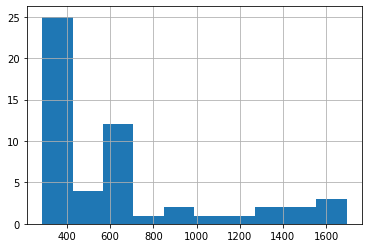

In [262]:
df.price_clean.hist()

## Tout encpasuler dans une fonction

In [264]:
def get_df(depart = "Paris", arrivee = "Abidjan") :
    
    prix_vol(depart,arrivee)
    html =  driver.find_element_by_css_selector("html")
    page_source = html.get_attribute("outerHTML")
    
    soup = BeautifulSoup(page_source)
    
    rows = soup.select( ".gws-flights-results__result-list "+
                       ".gws-flights-results__result-item")
    
    data = []
    for row in rows:
        try :
            data.append(get_row(row))
        except Exception:
            pass
        
    df = pd.DataFrame(data)
    return df

In [265]:
get_df("Dakar",  "Bamako")

,departure,arrival,company,nb_stops,stops_details,price,flight_duration
0,08:05,15:20,ASKY,1,1 h 20 min,874€,7h15min
1,05:10,01:30,+1,1,13 h 55 min,904€,20h20min
